In [ ]:
!git clone https://github.com/ramashisx/CleanLab.git

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

2023-03-17 09:35:42.055141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 09:35:42.481255: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-17 09:35:42.558509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lord/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-17 09:35:42.558546: I

In [2]:
df_train= pd.read_csv('train-labels.csv')

In [3]:
# !unzip '/content/drive/MyDrive/Participants_DCAI_Image.zip'

In [4]:
img= cv2.imread('autoencoder-denoising/train_/aeidlm.png')
# print(img)
# img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

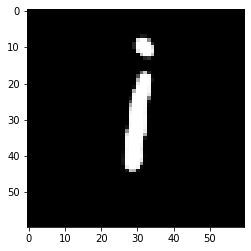

In [5]:
plt.imshow(img)

In [6]:
img_median= cv2.medianBlur(img,5)

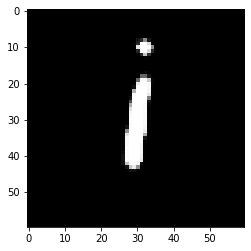

In [7]:
plt.imshow(img_median)

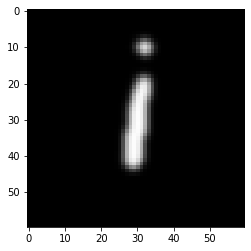

In [8]:
# blur threshold image
blur = cv2.GaussianBlur(img_median, (0,0), sigmaX=1, sigmaY=1, borderType = cv2.BORDER_DEFAULT)

plt.imshow(blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


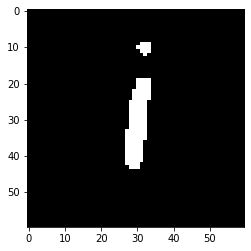

In [9]:
import skimage

result = skimage.exposure.rescale_intensity(blur, in_range=(100,200), out_range=(0,200))

plt.imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


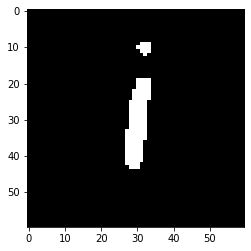

In [10]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=result, ddepth=-1, kernel=kernel)
plt.imshow(result)

In [11]:
df_train['location']= df_train['img'].apply(lambda x: 'autoencoder-denoising/train_/'+x )

In [12]:
df_train.head()

,id,img,label,location
0,0,wmzihn.png,c,autoencoder-denoising/train_/wmzihn.png
1,1,txdcgl.png,h,autoencoder-denoising/train_/txdcgl.png
2,2,bngxil.png,y,autoencoder-denoising/train_/bngxil.png
3,3,nsunix.png,p,autoencoder-denoising/train_/nsunix.png
4,4,yxkyuc.png,j,autoencoder-denoising/train_/yxkyuc.png


In [13]:
labels=df_train['label'].unique()

In [14]:
labels.sort()

In [15]:
labels

array(['2', '3', '4', '5', '6', '7', '8', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [16]:
map= dict(zip(labels,[i for i in range(0,33)]))
inv_map = {k : v for v, k in zip(map.keys(), map.values())}

In [17]:
df_train['labels_no'] = df_train['label'].apply(lambda x: map[x])

In [18]:
def image_to_array(img_loc):
  try:
    img= cv2.imread(img_loc)
    # img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    img= cv2.medianBlur(img,5)
    return img
  except:
    print(img_loc)
    return np.NaN


In [19]:
X_train=df_train['location'].apply(image_to_array)
X_train= np.array(X_train.to_list())

In [20]:
len(df_train)

9402

In [21]:
len(X_train)

9402

In [22]:
X_train[0].shape

(60, 60, 3)

In [23]:
df_val= pd.read_csv('val-labels.csv')

In [24]:
df_val['location'] = df_val['img'].apply(lambda x: 'autoencoder-denoising/val_/'+x )
X_val=df_val['location'].apply(image_to_array)
X_val= np.array(X_val.to_list())

In [25]:
X_train.shape

(9402, 60, 60, 3)

In [26]:
y_train= pd.get_dummies(df_train['labels_no']).to_numpy()

In [27]:
# y_train = df_train['labels_no'].to_numpy()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [29]:
# y_train[1]

5


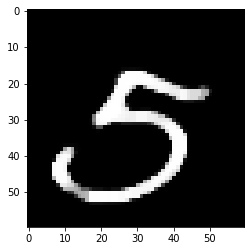

In [30]:
i = 4
plt.imshow(X_train[i])
print(inv_map[y_train[i].argmax()])

In [31]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(60,60,3)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(33, activation='softmax'))
# summarize the model
model.summary()

2023-03-17 09:36:07.479941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lord/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-17 09:36:07.480237: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 09:36:07.480264: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Linux): /proc/driver/nvidia/version does not exist
2023-03-17 09:36:07.480863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 192)       221376    
                                                        

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test) , batch_size=128, epochs=1,
          verbose=1, shuffle=True)

52/52 [==============================] - 322s 6s/step - loss: 4.1107 - accuracy: 0.1737 - val_loss: 2.4191 - val_accuracy: 0.4062


In [34]:
preds = model.predict(X_train)

206/206 [==============================] - 115s 557ms/step


In [37]:
preds[0]

array([0.01956059, 0.00357366, 0.01410631, 0.01272396, 0.09929055,
       0.02348766, 0.04406878, 0.009915  , 0.06270808, 0.03044409,
       0.00597655, 0.005752  , 0.02383676, 0.07569179, 0.01904597,
       0.04577035, 0.06864455, 0.01494328, 0.05337853, 0.00184718,
       0.0041186 , 0.02743451, 0.01525253, 0.03649931, 0.07060055,
       0.02049128, 0.06606016, 0.01304249, 0.00841663, 0.00266059,
       0.00399829, 0.08118368, 0.01547566], dtype=float32)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

# Get out-of-sample predicted probabilities for training data to pass into cleanlab.
pred_probs = cross_val_predict(model, X_train, y_train, method="predict_proba")
# Cross validation accuracy on training data.
cross_val_preds = np.argmax(pred_probs, axis=1)
acc = accuracy_score(y_train, cross_val_preds)
acc


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7f41be247f40>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [52]:
pred_probs = preds.max(axis=1)

In [58]:
# labels.argmax(axis=1)

In [53]:
from cleanlab.outlier import OutOfDistribution
from cleanlab.rank import find_top_issues

# Use To get outlier scores for train_data using
#  predicted class probabilities (from a trained classifier)
#  and given class labels
# Note: all of these are not necessarily outliers. You'll need to improve model performance to get better
# outlier predictions.
ood = OutOfDistribution()
labels = y_train
ood_scores = ood.fit_score(pred_probs=preds, labels=labels.argmax(axis=1))
ood_idx = find_top_issues(ood_scores, top=300)



Fitting OOD estimator based on provided pred_probs ...


Given Label: s


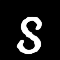

Given Label: 7


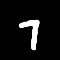

Given Label: s


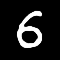

Given Label: u


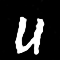

Given Label: f


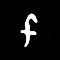

Given Label: a


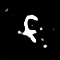

Given Label: 6


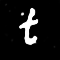

Given Label: o


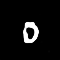

Given Label: c


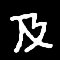

Given Label: 3


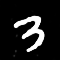

Given Label: 4


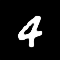

Given Label: o


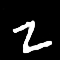

Given Label: g


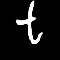

Given Label: s


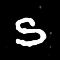

Given Label: 5


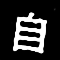

In [71]:
from PIL import Image
from cleanlab.filter import find_label_issues

# Compute label issues and get their indices.
# Note: all of these are not necessarily label errors. You'll need to improve model performance to get better
# label preditions.
labels = y_train
issues_idx = find_label_issues(labels=labels.argmax(axis=1), pred_probs=preds, return_indices_ranked_by='self_confidence')

# Show top 5.
for idx in issues_idx[:15]:
    row = df_train.iloc[idx]
    given_label = row['label']
    print(f"Given Label: {given_label}")
    display(Image.open(row['location']))

In [73]:
# Combine outliers and label issues (some overlap).
all_issues_idx = np.union1d(ood_idx, issues_idx)

# Drop all issues from training data.
X_train_clean = np.delete(X_train, all_issues_idx, axis=0)
y_train_clean = np.delete(y_train, all_issues_idx, axis=0)


# model_skorch.fit(X_train_clean, y_train_clean)
#
# # Predict to get submission.
# preds = model_skorch.predict(X_test)

In [74]:
all_issues_idx

array([   6,    7,    8, ..., 6577, 6578, 6579])